In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

url = "https://raw.githubusercontent.com/kethrinweiss/challenge3-alura-telecom-x-part-2/refs/heads/main/dados_tratados.csv"

df = pd.read_csv(url, encoding="utf-8-sig")

colunas_manter = [
    "customer.tenure", "account.Contract", "internet.InternetService",
    "account.Charges.Monthly", "account.PaymentMethod",
    "internet.OnlineSecurity", "internet.OnlineBackup", "internet.DeviceProtection",
    "internet.TechSupport", "internet.StreamingTV", "internet.StreamingMovies",
    "customer.Partner", "customer.Dependents", "phone.MultipleLines",
    "account.Charges.Total"
]

df = df[colunas_manter + ["Churn"]]

df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# PROPORÇÃO DE EVASÃO

Proporção de clientes ativos (Churn=0): 73.46%
Proporção de clientes que evadiram (Churn=1): 26.54%

⚠️ Atenção: Existe um certo desequilíbrio entre as classes, com menos clientes evadidos.


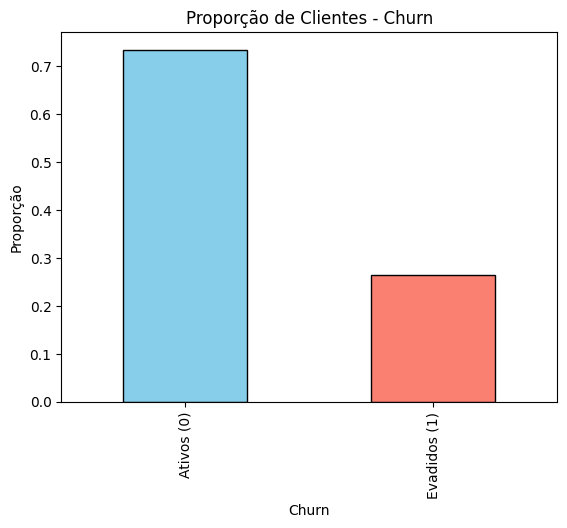

In [50]:
proporcao = df["Churn"].value_counts(normalize=True)

print("Proporção de clientes ativos (Churn=0): {:.2f}%".format(proporcao[0]*100))
print("Proporção de clientes que evadiram (Churn=1): {:.2f}%".format(proporcao[1]*100))

if proporcao[1] < 0.4:
    print("\n⚠️ Atenção: Existe um certo desequilíbrio entre as classes, com menos clientes evadidos.")
else:
    print("\n✅ As classes estão relativamente balanceadas.")

proporcao.plot(kind="bar", color=["skyblue", "salmon"], edgecolor="black")
plt.xticks([0,1], ["Ativos (0)", "Evadidos (1)"])
plt.ylabel("Proporção")
plt.title("Proporção de Clientes - Churn")
plt.show()

# PADRONIZAÇÃO DE VARIÁVEIS NUMÉRICAS

In [51]:
df_encoded = pd.get_dummies(df, drop_first=True)

colunas_numericas = ["customer.tenure", "account.Charges.Monthly", "account.Charges.Total"]
scaler = StandardScaler()
df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])

print("\nDataset após codificação e padronização:")
df_encoded.head()



Dataset após codificação e padronização:


,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn,account.Contract_One year,account.Contract_Two year,internet.InternetService_Fiber optic,internet.InternetService_No,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,internet.OnlineSecurity_Yes,internet.OnlineBackup_Yes,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,customer.Partner_Yes,customer.Dependents_Yes,phone.MultipleLines_Yes
0,-0.950200,0.029206,-0.743818,0.0,True,False,False,False,False,False,True,False,True,False,True,True,False,True,True,False
1,-0.950200,-0.159990,-0.766256,0.0,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True
2,-1.153700,0.304702,-0.881554,1.0,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False
3,-0.787401,1.104635,-0.459685,1.0,False,False,True,False,False,True,False,False,True,True,False,True,True,True,False,False
4,-1.194400,0.636624,-0.887483,1.0,False,False,True,False,False,False,True,False,False,False,True,True,False,True,False,False


# MATRIZ DE CORRELAÇÃO

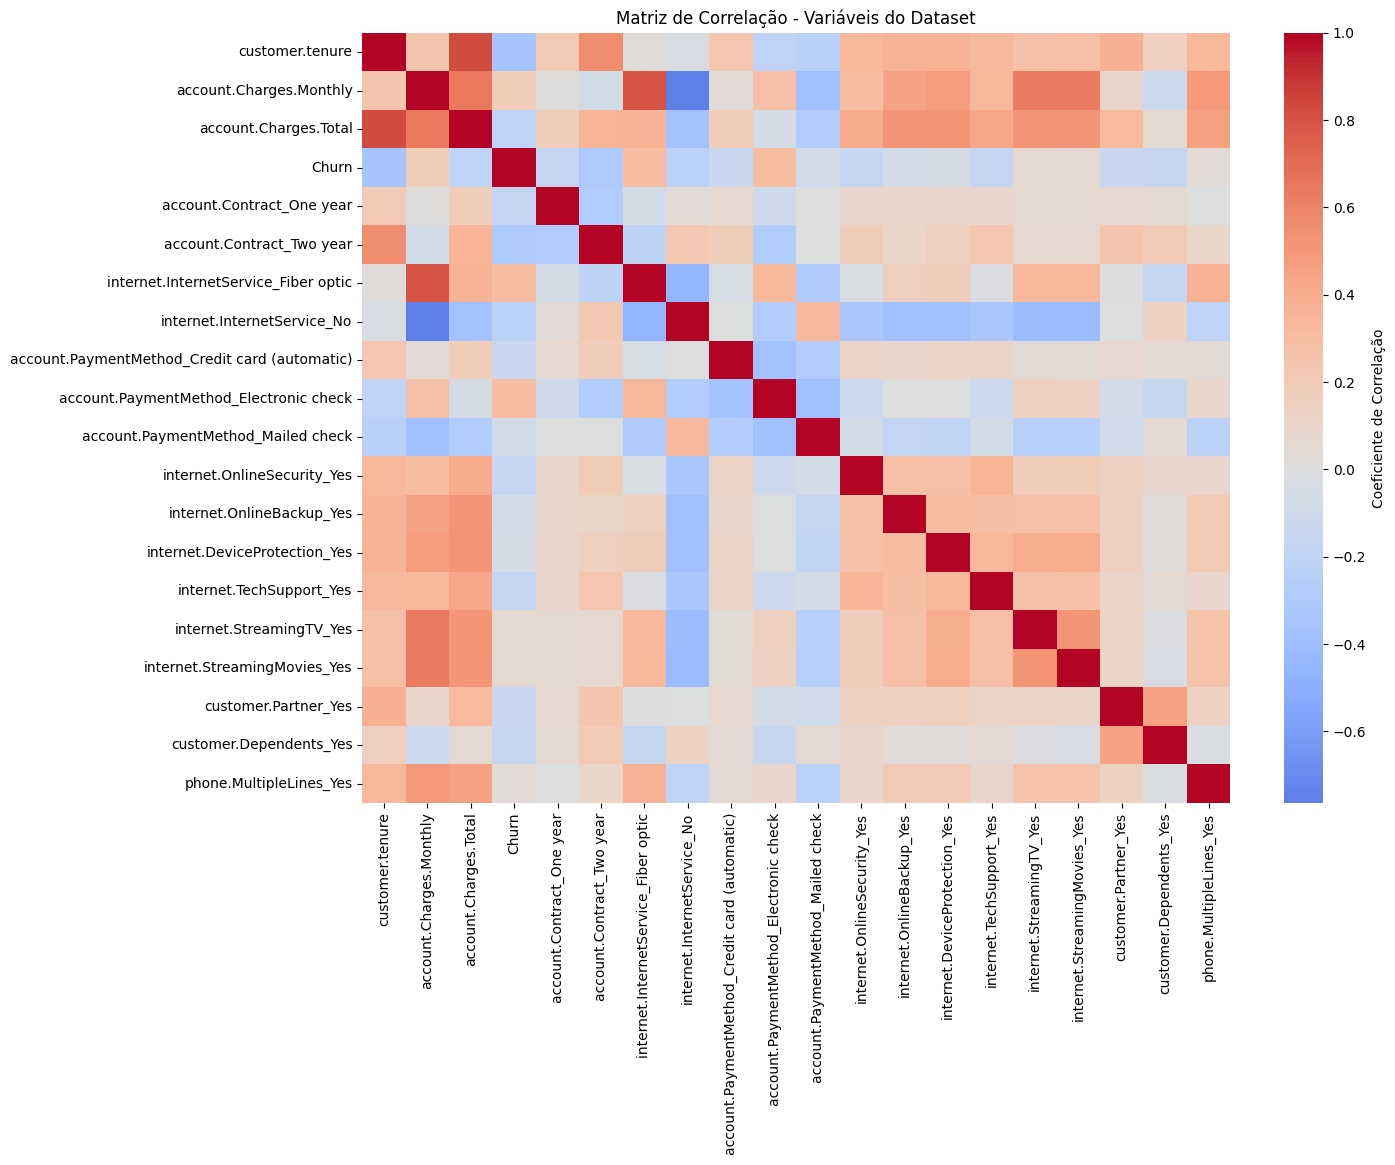


Correlação das variáveis com a evasão (Churn):
Churn                                            1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
account.Charges.Monthly                          0.193356
internet.StreamingTV_Yes                         0.063228
internet.StreamingMovies_Yes                     0.061382
phone.MultipleLines_Yes                          0.040102
internet.DeviceProtection_Yes                   -0.066160
internet.OnlineBackup_Yes                       -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit card (automatic)   -0.134302
customer.Partner_Yes                            -0.150448
customer.Dependents_Yes                         -0.164221
internet.TechSupport_Yes                        -0.164674
internet.OnlineSecurity_Yes                     -0.171226
account.Contract_One year                       -0.177820
account.Charges.Total   

In [52]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(14,10))
heatmap = sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    cbar=True,
    cbar_kws={'label': 'Coeficiente de Correlação'}
)
plt.title("Matriz de Correlação - Variáveis do Dataset")
plt.show()

corr_com_churn = corr_matrix["Churn"].sort_values(ascending=False)

print("\nCorrelação das variáveis com a evasão (Churn):")
print(corr_com_churn)

# ANÁLISES DIRECIONAIS

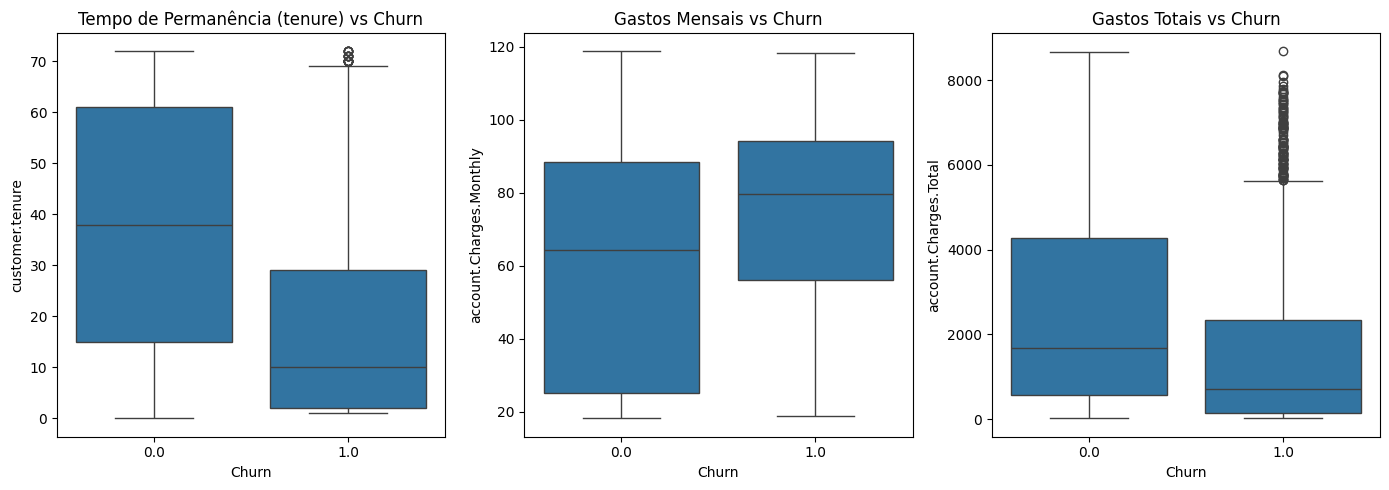

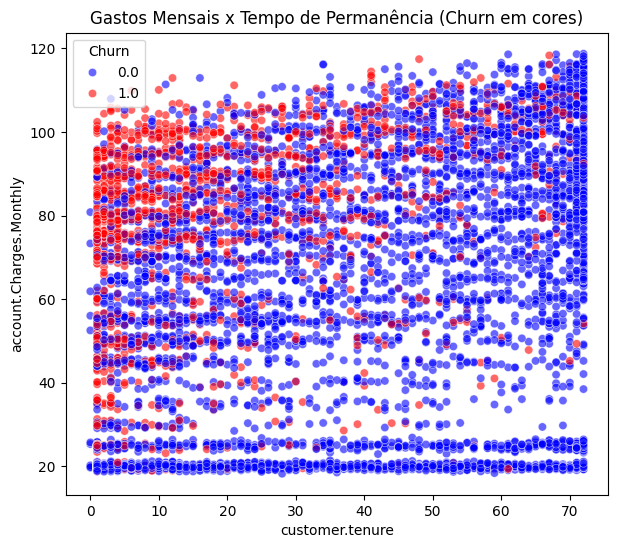

In [53]:
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
sns.boxplot(x="Churn", y="customer.tenure", data=df)
plt.title("Tempo de Permanência (tenure) vs Churn")

plt.subplot(1,3,2)
sns.boxplot(x="Churn", y="account.Charges.Monthly", data=df)
plt.title("Gastos Mensais vs Churn")

plt.subplot(1,3,3)
sns.boxplot(x="Churn", y="account.Charges.Total", data=df)
plt.title("Gastos Totais vs Churn")

plt.tight_layout()
plt.show()

plt.figure(figsize=(7,6))
sns.scatterplot(
    x="customer.tenure",
    y="account.Charges.Monthly",
    hue="Churn",
    data=df,
    palette={0: "blue", 1: "red"},
    alpha=0.6
)
plt.title("Gastos Mensais x Tempo de Permanência (Churn em cores)")
plt.show()


# SEPARAÇÃO DE DADOS

In [54]:
df_encoded = df_encoded.dropna(subset=["Churn"])

X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)
print("Proporção de evasão no treino:", y_train.mean())
print("Proporção de evasão no teste:", y_test.mean())

Tamanho do conjunto de treino: (4930, 19)
Tamanho do conjunto de teste: (2113, 19)
Proporção de evasão no treino: 0.2653144016227181
Proporção de evasão no teste: 0.26549929010885


# REGRESSÃO LÓGICA

=== Regressão Logística ===
Acurácia: 0.792238523426408
Precisão: 0.6234817813765182
Recall: 0.5490196078431373
F1-Score: 0.5838862559241706


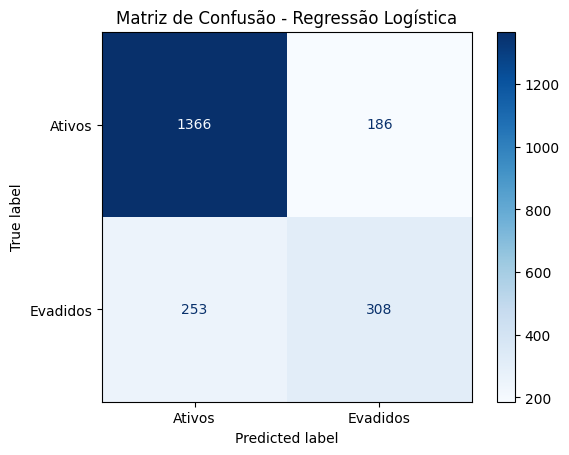

In [55]:
imputer = SimpleImputer(strategy="mean")

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("=== Regressão Logística ===")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("Precisão:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-Score:", f1_score(y_test, y_pred_log))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log), display_labels=["Ativos", "Evadidos"]).plot(cmap="Blues")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

# KNN


=== KNN ===
Acurácia: 0.754850922858495
Precisão: 0.5436105476673428
Recall: 0.47771836007130125
F1-Score: 0.50853889943074


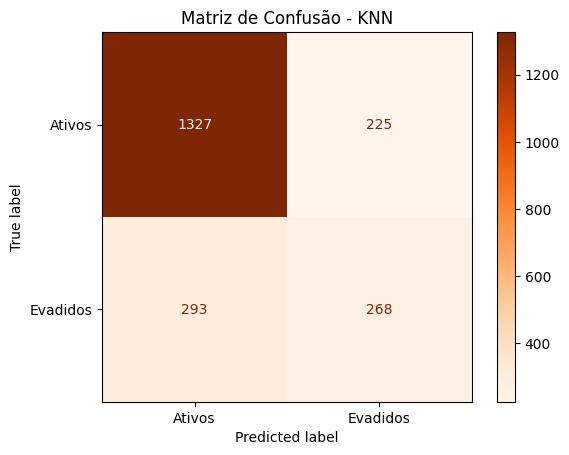

In [56]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\n=== KNN ===")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("Precisão:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1-Score:", f1_score(y_test, y_pred_knn))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn), display_labels=["Ativos", "Evadidos"]).plot(cmap="Oranges")
plt.title("Matriz de Confusão - KNN")
plt.show()

# AVALIAÇÃO E COMPARAÇÃO DOS MODELOS ADOTADOS

- **DESEMPENHO**

1. Regressão Logística:

    Acurácia: 0.79

    Precisão: 0.62

    Recall: 0.55

    F1-Score: 0.58

2. KNN

    Acurácia: 0.75

    Precisão: 0.54

    Recall: 0.48

    F1-Score: 0.51


- **RELATÓRIO**

    Melhor modelo:

    A Regressão Logística superou o KNN em todas as métricas (acurácia, precisão, recall e F1). Isso mostra que ela está conseguindo generalizar melhor e capturar os clientes que evadem com mais eficiência.

    KNN apresentou sinais de underfitting.

    Métricas consistentemente mais baixas.

    Pode ser que o modelo esteja muito simples com n_neighbors=5.

    Ajustar n_neighbors, padronização e até ponderar vizinhos pela distância (weights="distance") pode melhorar.

    Regressão Logística ainda não está perfeita.

    O recall (0.55) indica que ela perde quase metade dos clientes que realmente evadem.

    Para negócios, isso pode ser crítico, já que identificar corretamente quem vai sair é mais importante do que ter apenas boa acurácia.

    Poderíamos melhorar com regularização (ajustar parâmetro C) ou usando SMOTE/oversampling para equilibrar as classes.

    Conclusão prática:

    Se a prioridade é prever evasão corretamente (recall alto): precisamos melhorar ambos os modelos, talvez com técnicas de balanceamento de classes.

    Se a prioridade é desempenho geral: a Regressão Logística já é a escolha mais adequada neste estágio.

# RELATÓRIO DE ANÁLISE DE EVASÃO DE CLIENTES (CHURN)

1. **VISÃO GERAL**

    O objetivo desta análise foi identificar os fatores que mais influenciam a evasão de clientes (Churn) e avaliar modelos preditivos capazes de antecipar esse comportamento.
    Foram testados dois algoritmos de Machine Learning: Regressão Logística e K-Nearest Neighbors (KNN), utilizando variáveis relacionadas a contrato, perfil de uso e relacionamento do cliente.

2. **DESEMPENHO DOS MODELOS ADOTADOS**

    A Regressão Logística apresentou desempenho superior em todas as métricas, sendo mais adequada para identificar clientes em risco de evasão.

3. **FATORES QUE MAIS INFLUENCIAM A EVASÃO**

    Com base nas correlações e interpretação da Regressão Logística, os principais fatores relacionados à evasão são:

    Tipo de Contrato (Contract)

    Clientes com contratos mensais apresentam maior propensão à evasão.

    Contratos de longo prazo (1 ou 2 anos) estão associados a maior fidelização.

    Método de Pagamento (PaymentMethod)

    Pagamentos via cartão de crédito ou débito automático estão mais associados à permanência.

    Clientes que usam boletos têm maior taxa de evasão.

    Serviços de Internet (InternetService e adicionais)

    Clientes com Fiber Optic têm maior probabilidade de evadir em comparação com DSL.

    Ausência de serviços adicionais (como OnlineSecurity, TechSupport, Backup) aumenta o risco de churn.

    Esses serviços funcionam como barreiras de saída, mantendo o cliente atrelado.

    Tempo de Permanência (Tenure)

    Clientes novos (baixo tenure) são mais suscetíveis a cancelar.

    Quanto maior o tempo de relacionamento, menor a evasão.

    Gastos Mensais (MonthlyCharges) vs. Gastos Totais (TotalCharges)

    Clientes com gastos mensais altos e gastos totais baixos (recém-chegados com planos caros) tendem a evadir.

    Clientes antigos com alto gasto total estão mais fidelizados.

    Características Pessoais (Partner, Dependents, MultipleLines)

    Clientes sem parceiro ou dependentes apresentam taxas maiores de evasão.

    Ter dependentes/ família vinculada reduz a chance de churn, pois o serviço tem maior utilidade conjunta.

4. **ESTRATÉGIAS DE RETENÇÃO**

    Com base nos fatores identificados, sugerem-se as seguintes ações:

    🔹 1. Incentivar Contratos de Longo Prazo

    Oferecer descontos ou benefícios exclusivos para clientes que migrem de contrato mensal para anual/bianual.

    Campanhas específicas para clientes nos primeiros meses de contrato, momento crítico da evasão.

    🔹 2. Otimizar o Portfólio de Serviços

    Estimular adesão a serviços complementares (segurança online, suporte técnico, backup).

    Pacotes de valor agregado podem reduzir a chance de saída, criando um efeito lock-in.

    🔹 3. Personalizar a Política de Preços

    Clientes com mensalidades altas e pouco tempo de casa são os mais vulneráveis.

    Oferecer descontos temporários, bônus de fidelidade ou upgrades gratuitos no início da jornada.

    🔹 4. Melhorar a Experiência de Pagamento

    Incentivar o uso de pagamento automático (débito ou cartão).

    Oferecer benefícios extras para quem abandonar o boleto, reduzindo atrasos e cancelamentos.

    🔹 5. Programas de Engajamento

    Identificar clientes sem parceiro/dependentes e criar estratégias de retenção específicas, como promoções de upgrade para múltiplas linhas.

    Campanhas familiares podem aumentar a percepção de valor do serviço.

5. **CONCLUSÃO**

    A Regressão Logística se mostrou mais eficaz para previsão de churn, com recall de 55%.

    Os principais fatores que afetam a evasão são: tipo de contrato, método de pagamento, serviços adicionais, tempo de permanência e perfil de gastos.

    Estratégias de retenção devem focar na fidelização inicial do cliente, na oferta de serviços complementares e na adoção de métodos de pagamento mais seguros.

    Com a aplicação dessas ações, espera-se reduzir significativamente a evasão e aumentar a retenção de clientes de alto valor.